In [65]:
#Data Analysis packages 
import pandas as pd 
import numpy as np 
import datetime 
#Plots
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid", palette="muted", font_scale=1.5)
plt.rcParams["figure.figsize"] = (10, 5)
#Missing values viz package
!pip install missingno
import missingno as msno


In [5]:
#Upload files 
df_train=pd.read_csv(r'/Users/mezgha/Desktop/widsdatathon2022/train.csv')
df_test=pd.read_csv(r'/Users/mezgha/Desktop/widsdatathon2022/test.csv')

In [9]:
#df_test.head()
#df_train.head()

In [10]:
####################Exploratory Data Analysis 

In [12]:
#get Train data types 
pd.set_option('display.max_rows',500)
df_train.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
year_built                   float64
energy_star_rating           float64
ELEVATION                    float64
january_min_temp               int64
january_avg_temp             float64
january_max_temp               int64
february_min_temp              int64
february_avg_temp            float64
february_max_temp              int64
march_min_temp                 int64
march_avg_temp               float64
march_max_temp                 int64
april_min_temp                 int64
april_avg_temp               float64
april_max_temp                 int64
may_min_temp                   int64
may_avg_temp                 float64
may_max_temp                   int64
june_min_temp                  int64
june_avg_temp                float64
june_max_temp                  int64
july_min_temp                  int64
j

In [13]:
#get test data types
#get data types 
pd.set_option('display.max_rows',500)
df_test.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
year_built                   float64
energy_star_rating           float64
ELEVATION                    float64
january_min_temp               int64
january_avg_temp             float64
january_max_temp               int64
february_min_temp              int64
february_avg_temp            float64
february_max_temp              int64
march_min_temp                 int64
march_avg_temp               float64
march_max_temp                 int64
april_min_temp                 int64
april_avg_temp               float64
april_max_temp                 int64
may_min_temp                   int64
may_avg_temp                 float64
may_max_temp                   int64
june_min_temp                  int64
june_avg_temp                float64
june_max_temp                  int64
july_min_temp                  int64
j

In [18]:
#Get Train data info 
df_train.info()
print('Size of train data is: ', df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [17]:
#Get Test data info, test is 13% of training data 
df_test.info()
print('Size of test sample is : ', df_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [20]:
#print columns of both train and test data 
print('Columns in train data are: ',df_train.columns)
print('Columns in test data are: ',df_test.columns)

Columns in train data are:  Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipit

In [22]:
#Key Statistics
pd.set_option('display.max_columns', None)
df_train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [30]:
# Check for missing data
missing_data_columns = [col for col in df_train.columns
                                 if df_train[col].isnull().any()]
miss_count = df_train.isna().sum()
miss_df = (pd.concat(
                      [miss_count.rename('Missing count'),
                       miss_count.div(len(df_train)).rename('Missing value')],
                       axis = 1
                       ).loc[miss_count.ne(0)]
          )
miss_df.style.background_gradient(cmap="RdGy")

,Missing count,Missing value
year_built,1837,0.024249
energy_star_rating,26709,0.352561
direction_max_wind_speed,41082,0.542287
direction_peak_wind_speed,41811,0.551909
max_wind_speed,41082,0.542287
days_with_fog,45796,0.604512


<AxesSubplot:>

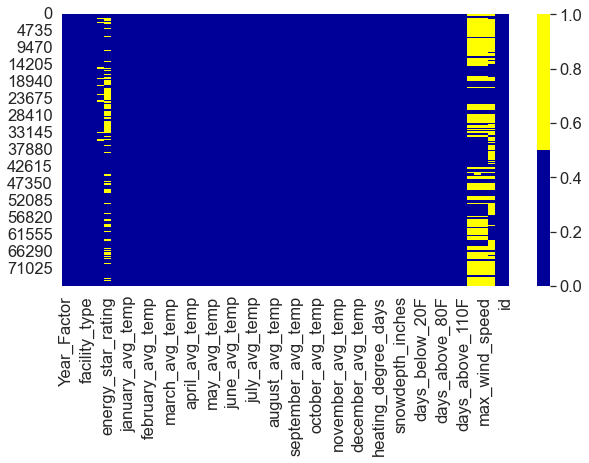

In [54]:
#using a heatmap 
cols = df_train.columns[:64] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_train[cols].isnull(), cmap=sns.color_palette(colours))

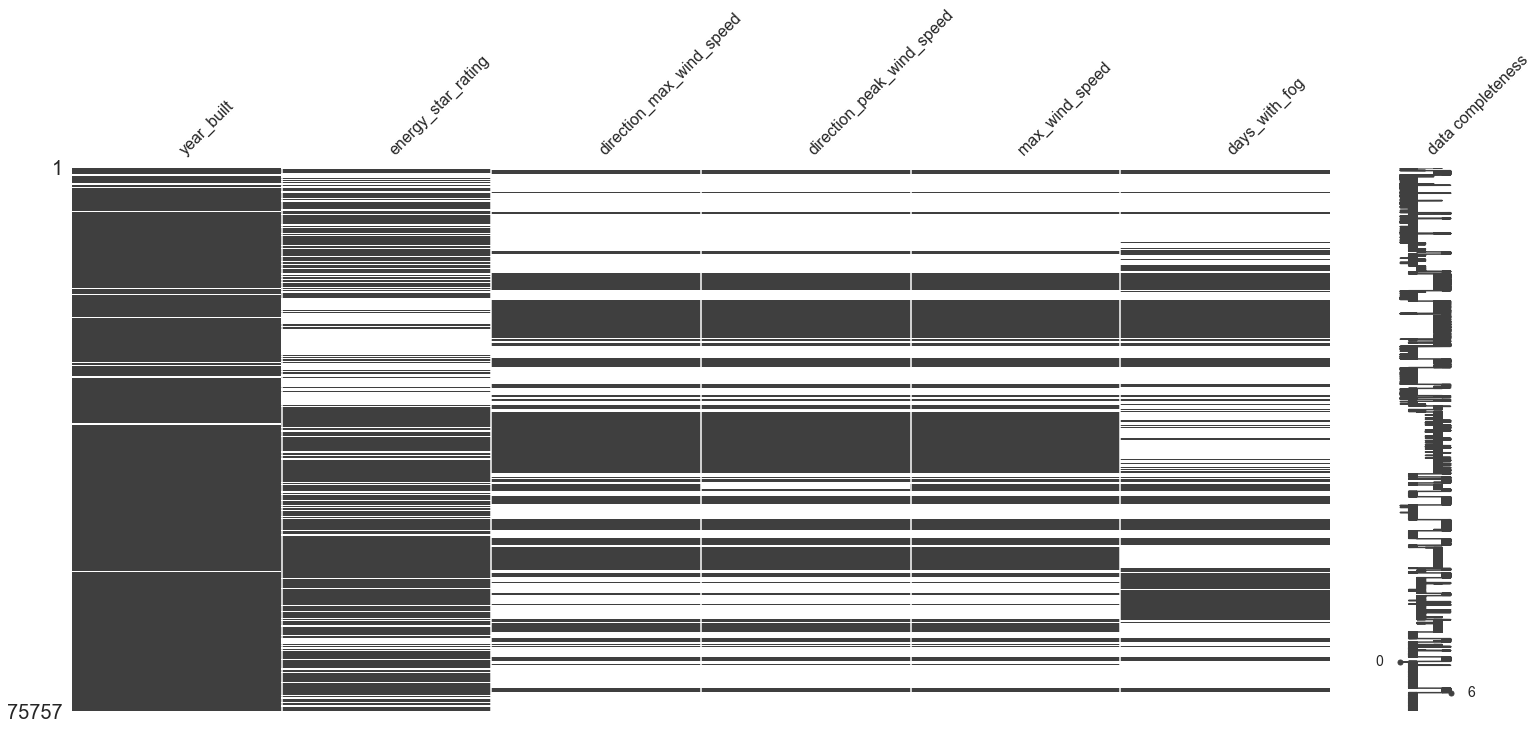

In [58]:
#use matrix with msno
df_miss=df_train[['year_built','energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed',
                  'max_wind_speed','days_with_fog']]
msno.matrix(df_miss,labels=True);

""""The sparkline at right summarizes the general shape of the data completeness and points out the rows
with the maximum and minimum nullity in the dataset."""

<AxesSubplot:>

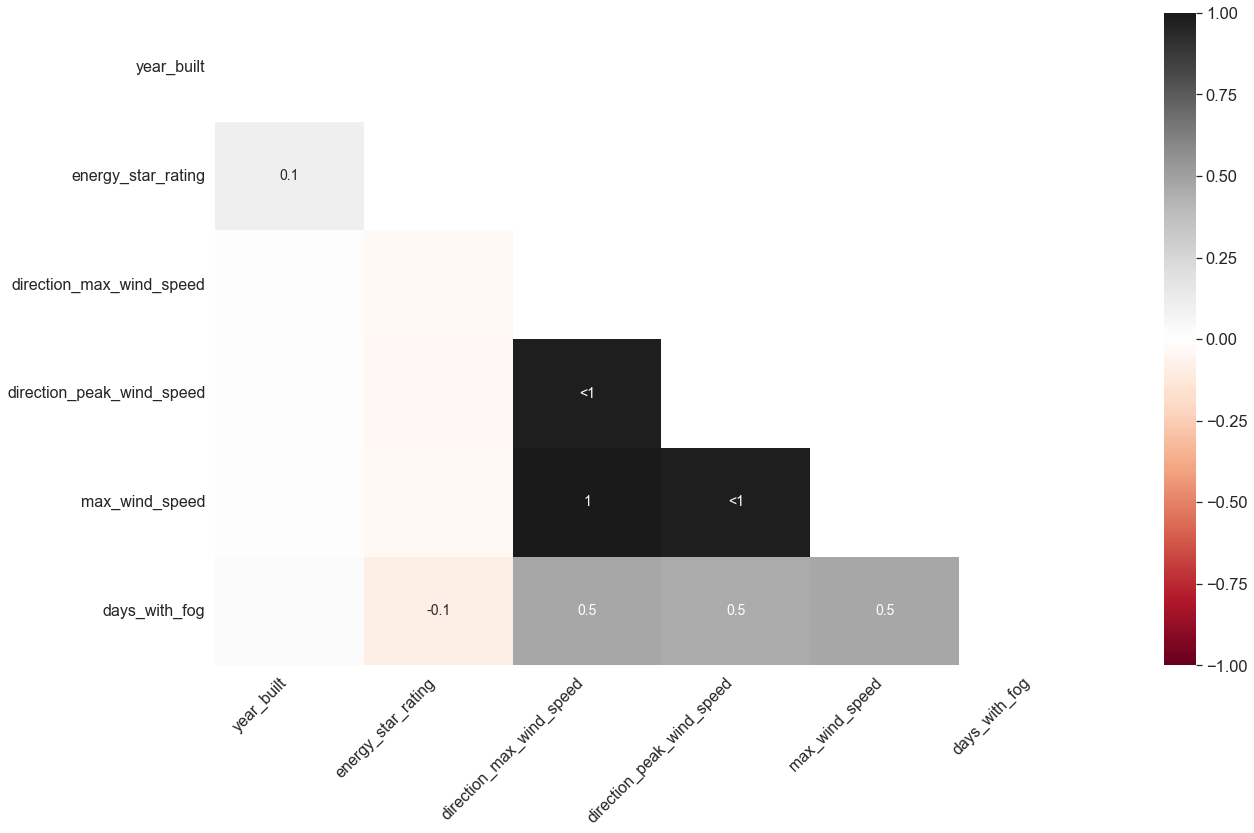

In [60]:
# msno with heatmap 
msno.heatmap(df_train, cmap='RdGy')
#we notice that missingness of 'day_ with_fog' correlates with missingness in directin_[max,peek]_speed and max_wind_speed, maybe this data is get with sensors and when it's foggy out the sensor does not work well


<AxesSubplot:>

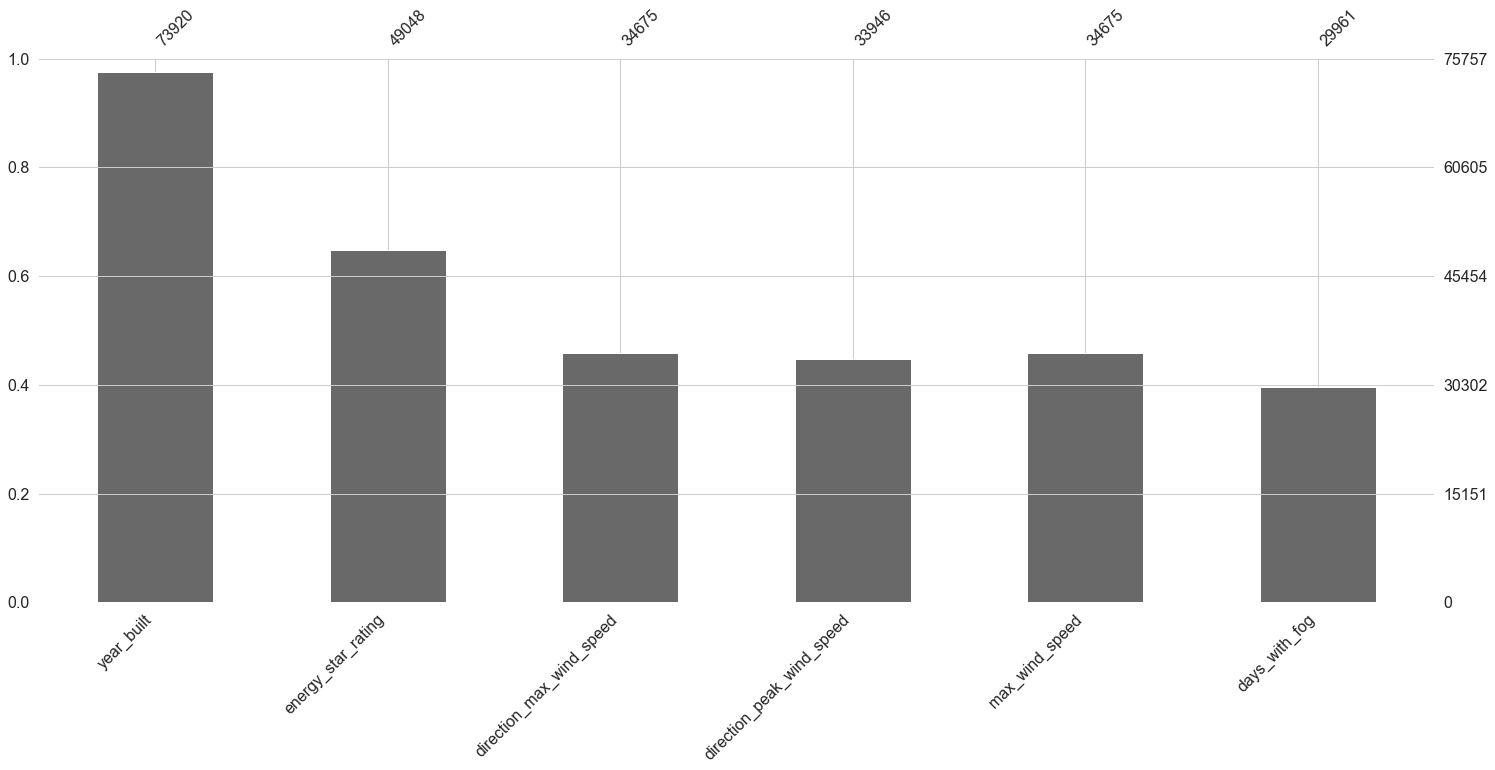

In [61]:
## bar chart to visualize the number of missing values, we already know but it helps to visualize it
msno.bar(df_miss)


In [ ]:
#Clean the data 

In [50]:
# Find Categorical Columns
""""categorical_cols = [
    c
    for c in df_train.columns
    if (1 < df_train[c].nunique()) & (df_train[c].dtype != np.number) & (df_train[c].dtype != int)
]
categorical_cols"""

df_cat = df_train.select_dtypes(exclude=[np.number])
cat_cols = df_cat.columns.values
print('Categorical columns are : ',cat_cols)

Categorical columns are :  ['State_Factor' 'building_class' 'facility_type']


In [51]:
# assign "category" data type  to categrical values 
for col in cat_cols:
    df_train[col] = df_train[col].astype("category")

In [52]:
pd.set_option('display.max_rows', 10)
df_train[col]

0                     Grocery_store_or_food_market
1        Warehouse_Distribution_or_Shipping_center
2                             Retail_Enclosed_mall
3                        Education_Other_classroom
4                        Warehouse_Nonrefrigerated
                           ...                    
75752                         Office_Uncategorized
75753                          5plus_Unit_Building
75754                             Commercial_Other
75755                             Commercial_Other
75756                           2to4_Unit_Building
Name: facility_type, Length: 75757, dtype: category
Categories (60, object): ['2to4_Unit_Building', '5plus_Unit_Building', 'Commercial_Other', 'Commercial_Unknown', ..., 'Warehouse_Nonrefrigerated', 'Warehouse_Refrigerated', 'Warehouse_Selfstorage', 'Warehouse_Uncategorized']

In [53]:
#Show numerical columns 
num_col = df_train.select_dtypes("number").columns
print('Numerical columns: ',num_col)

Numerical columns:  Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_

In [62]:
############EDA Visualization

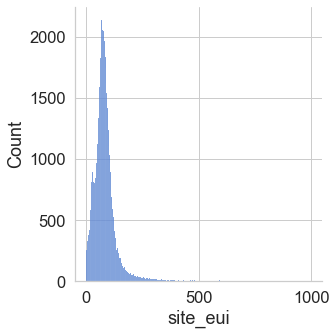

In [63]:
sns.displot(df_train['site_eui'])
# variable normally distributed, positively skewed to the right 

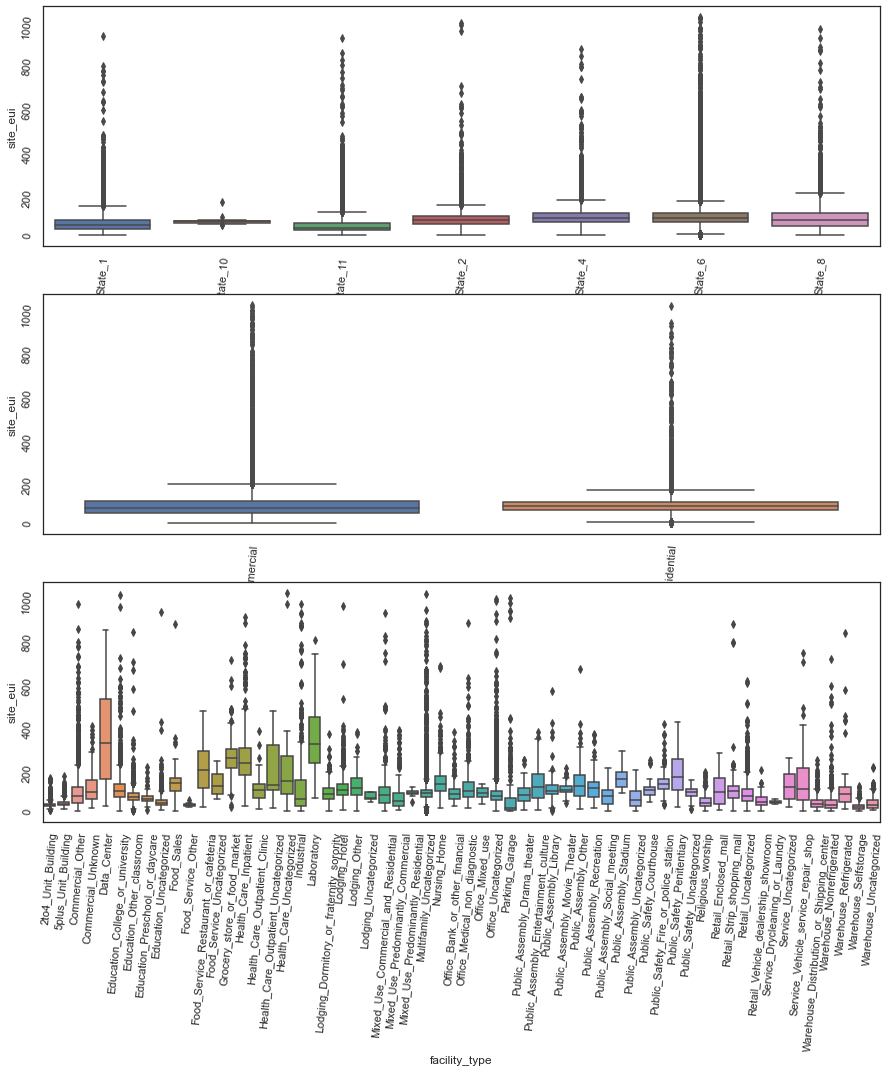

In [70]:
#Relationship between target variable and categorical variables using boxplots
plt.figure(figsize=(15, 15))
sns.set(style="white")
i = 1
for col in cat_cols:
    plt.subplot(3, 1, i)
    ax = sns.boxplot(data=df_train, x=col, y="site_eui")
    i = i + 1
    ax.tick_params(labelrotation=85)
plt.show()

##Insights 
#states 1,2,4,6,11 have similar eui whereas state 8 is on the higher end and state 10 is on the lower end 
#not a big difference between residential and commercial buildings, though commercial is higher 
#we can see a plethora of diffences in eui related facility types, where clearly the data center 
#consumes the most of energy 


In [94]:
#I want to categorize facility types, example: 'Warehouse_Nonrefrigerated', 
#'Warehouse_Refrigerated', 'Warehouse_Selfstorage', 'Warehouse_Uncategorized' into just "warehouse"
df_train.facility_type.unique()


['Grocery_store_or_food_market', 'Warehouse_Distribution_or_Shipping_center', 'Retail_Enclosed_mall', 'Education_Other_classroom', 'Warehouse_Nonrefrigerated', ..., 'Public_Safety_Courthouse', 'Public_Assembly_Stadium', 'Lodging_Uncategorized', '2to4_Unit_Building', 'Warehouse_Uncategorized']
Length: 60
Categories (60, object): ['2to4_Unit_Building', '5plus_Unit_Building', 'Commercial_Other', 'Commercial_Unknown', ..., 'Warehouse_Nonrefrigerated', 'Warehouse_Refrigerated', 'Warehouse_Selfstorage', 'Warehouse_Uncategorized']

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


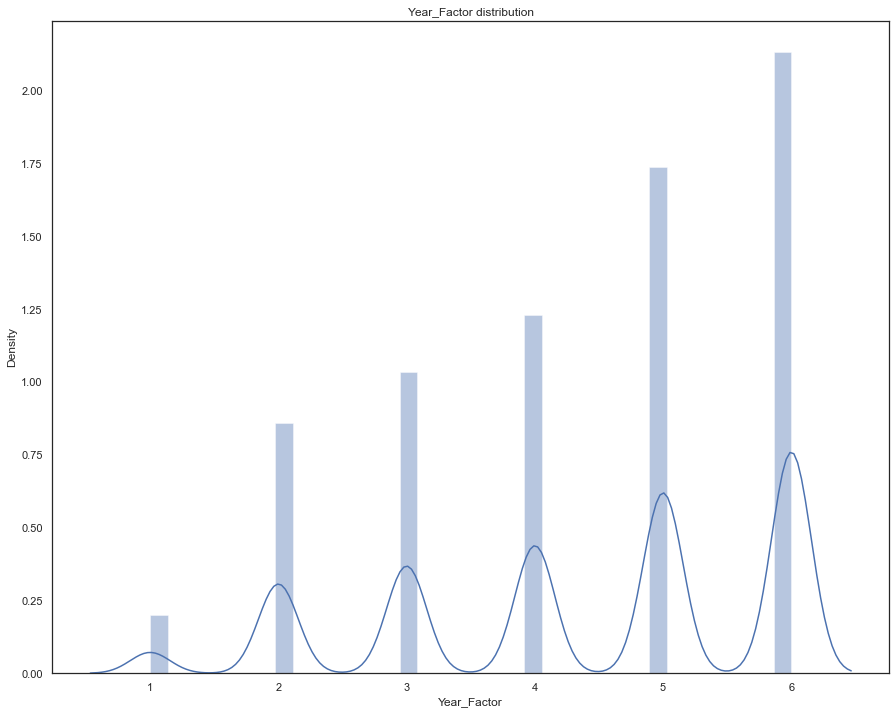

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


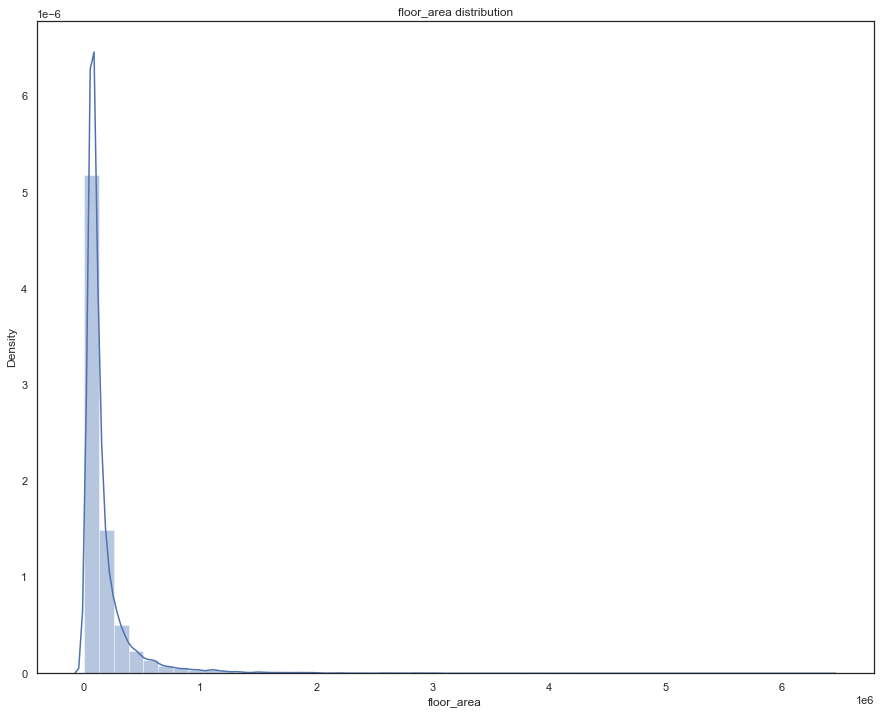

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


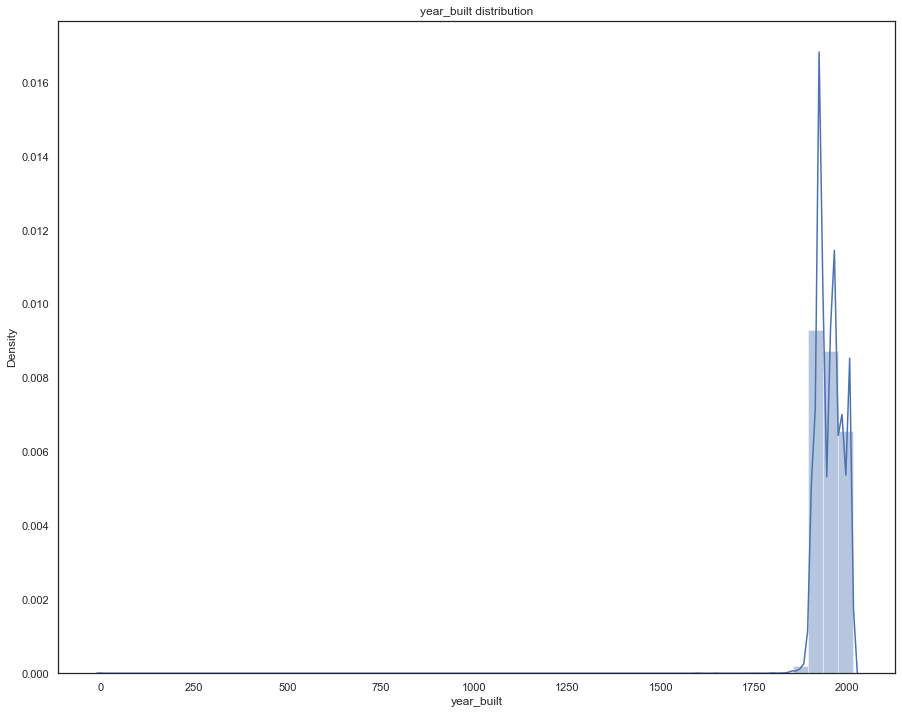

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


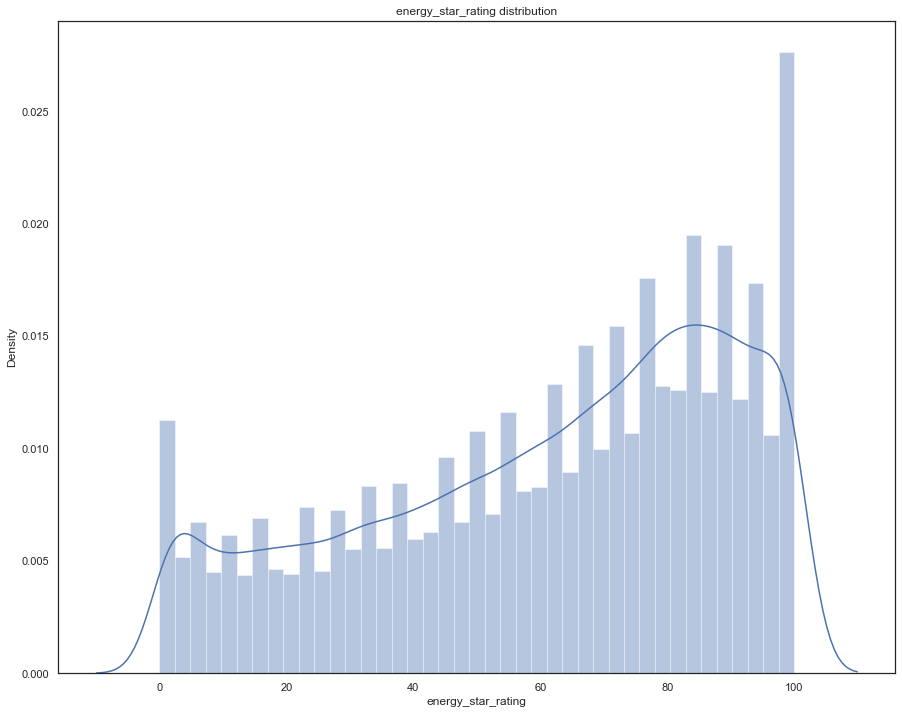

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


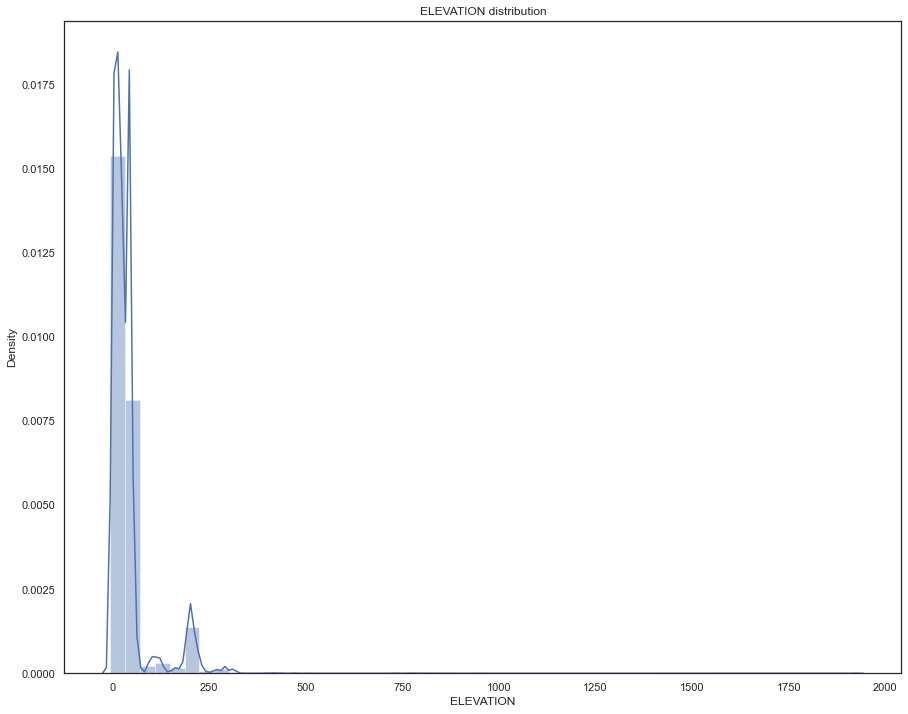

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


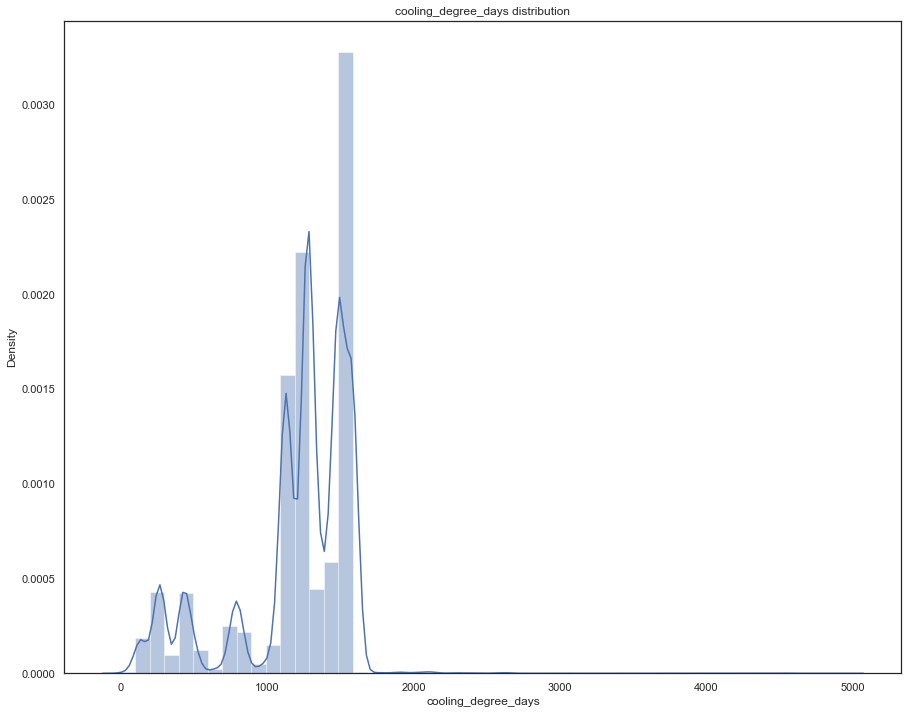

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


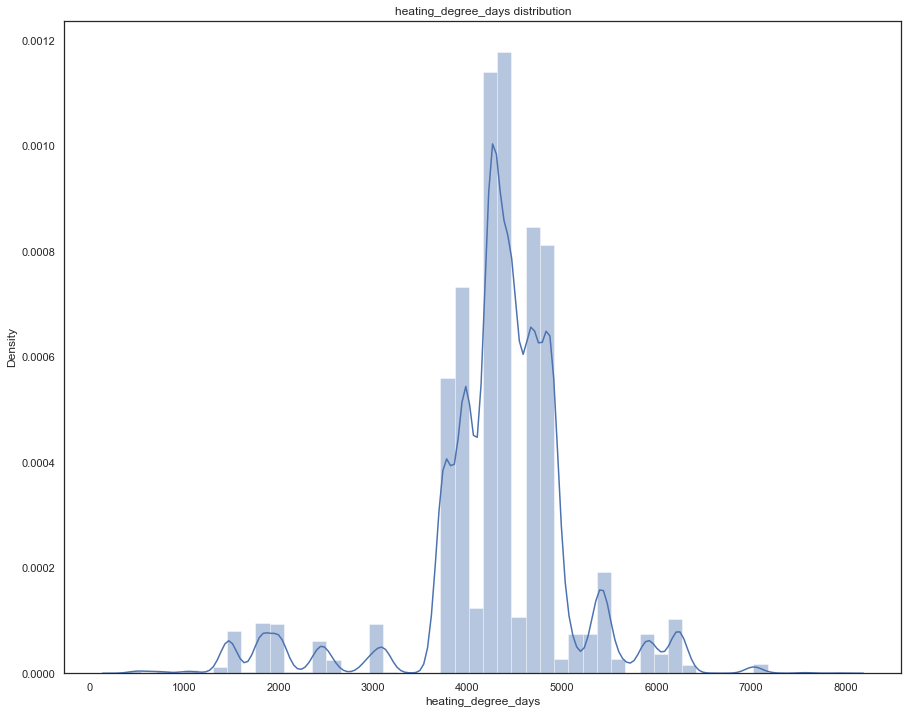

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


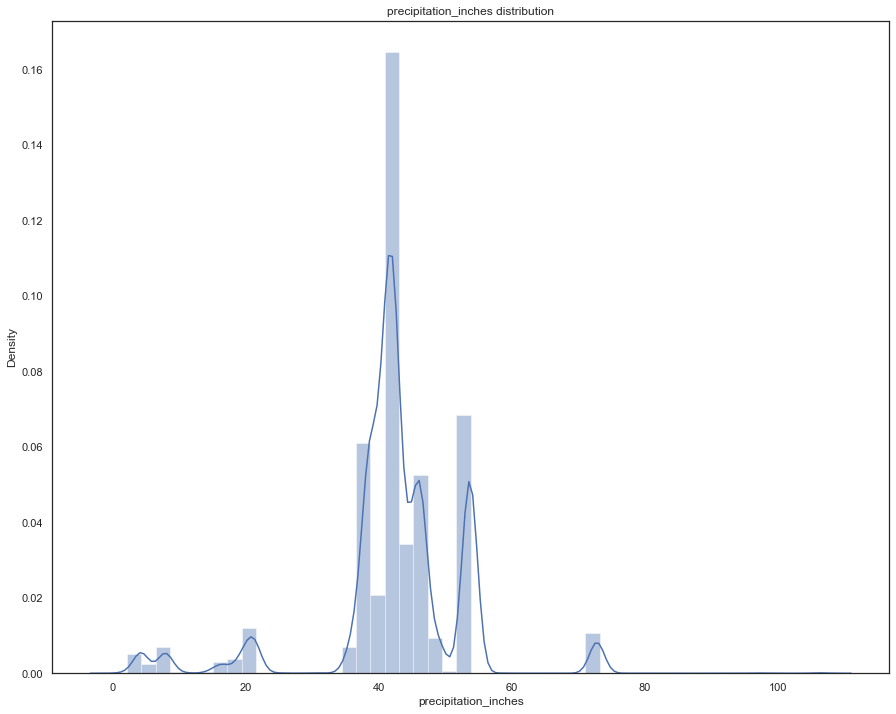

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


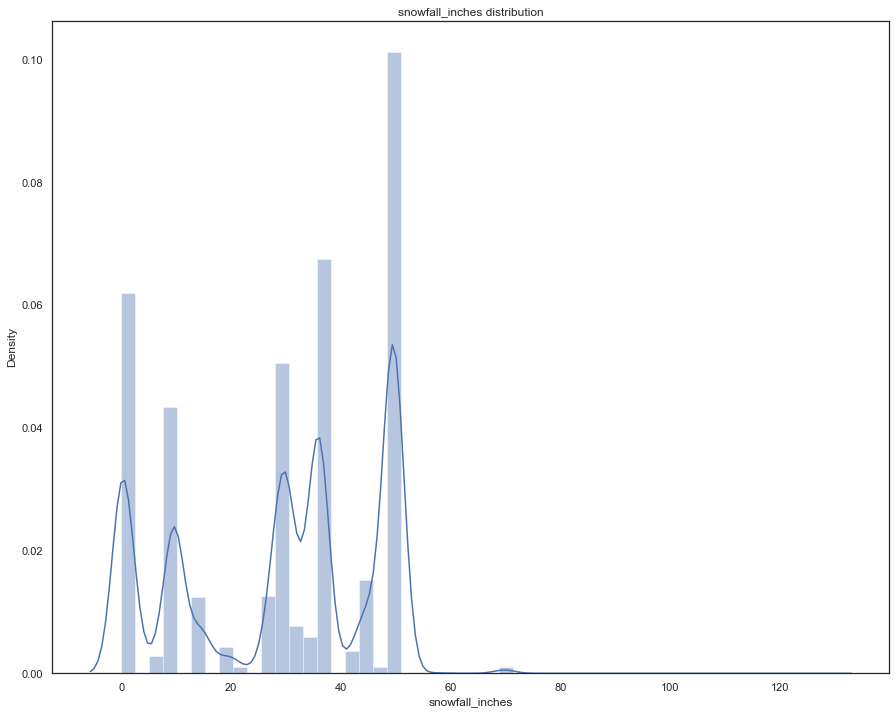

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


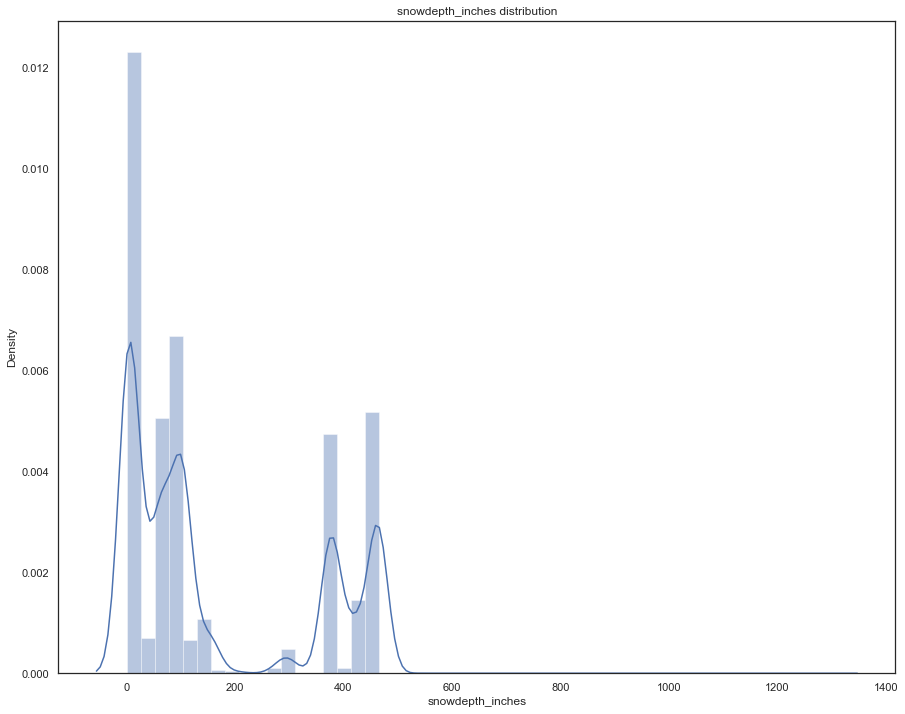

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


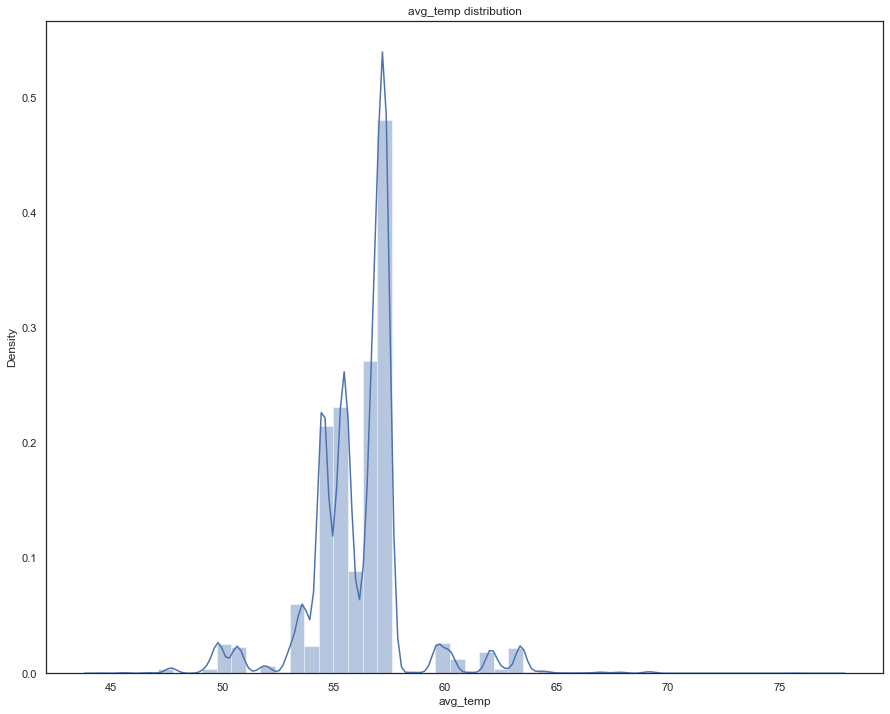

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


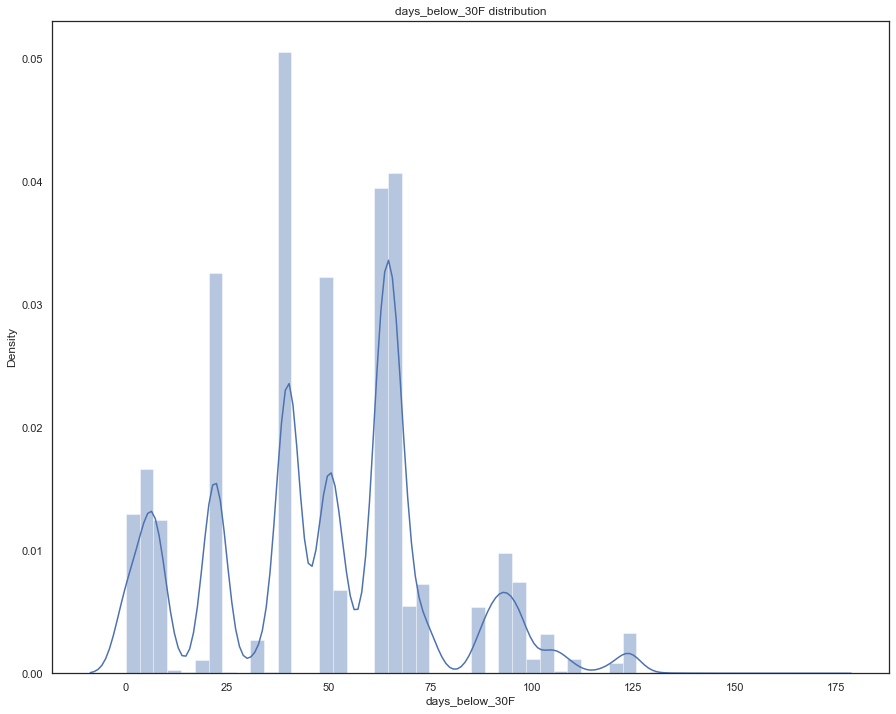

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


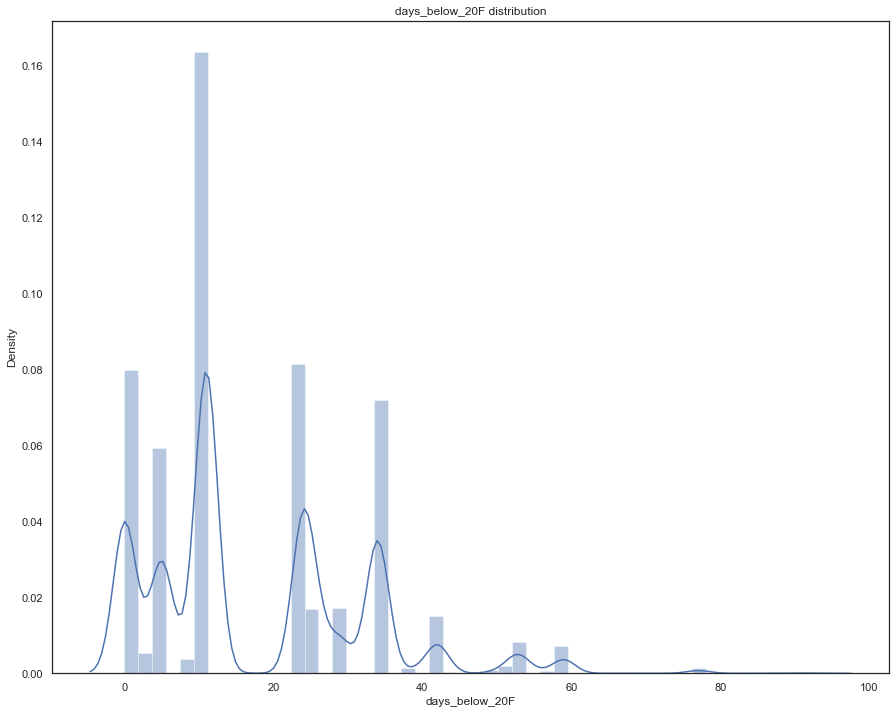

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


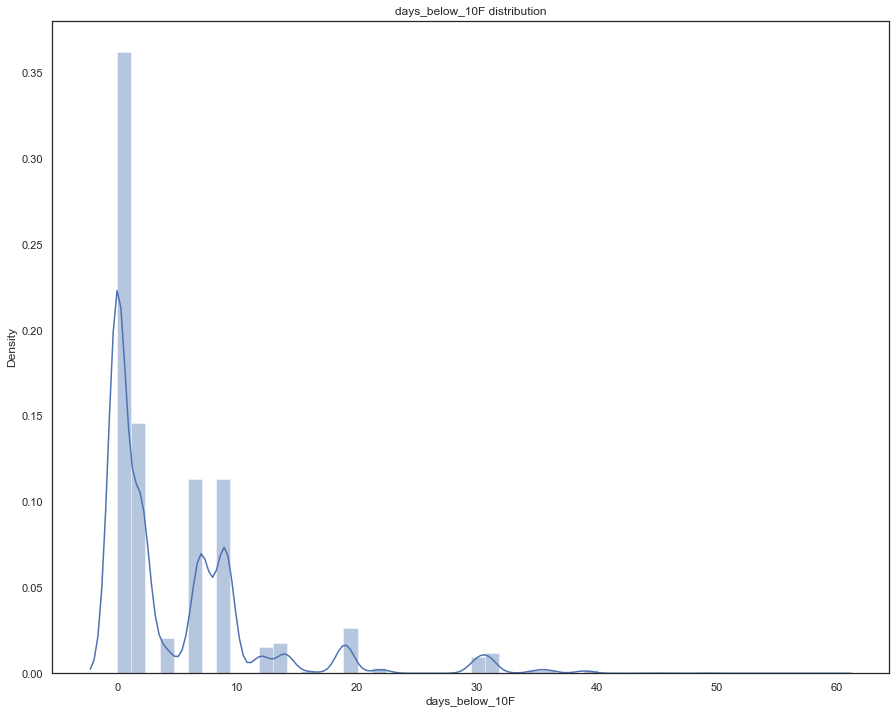

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


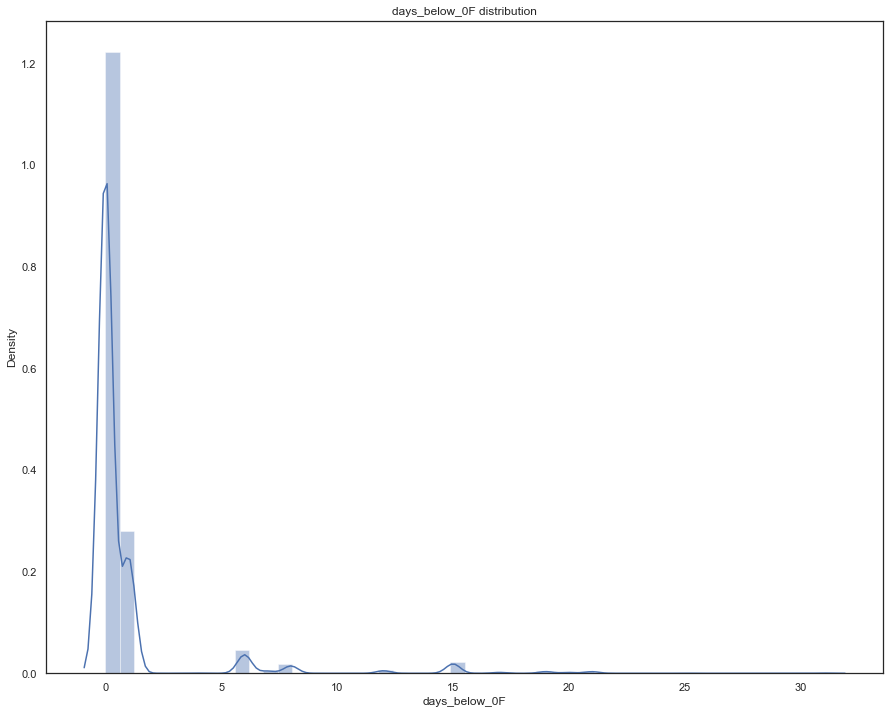

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


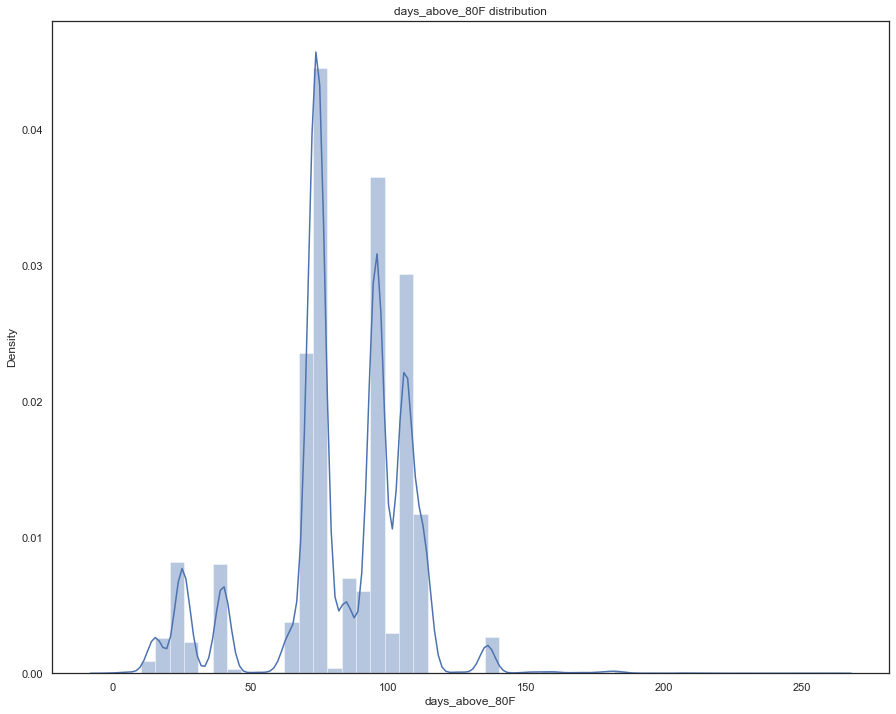

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


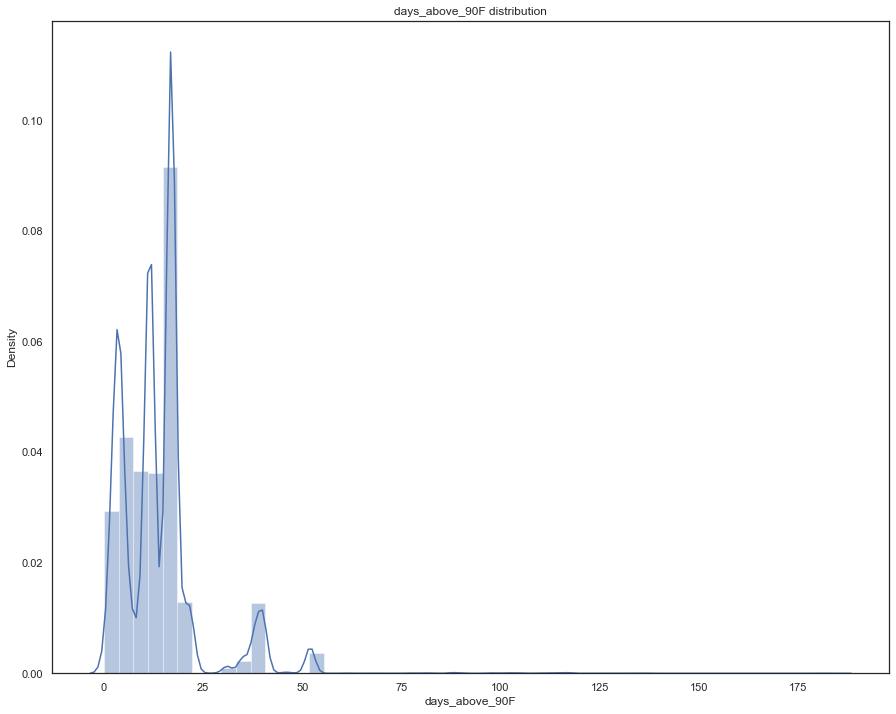

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


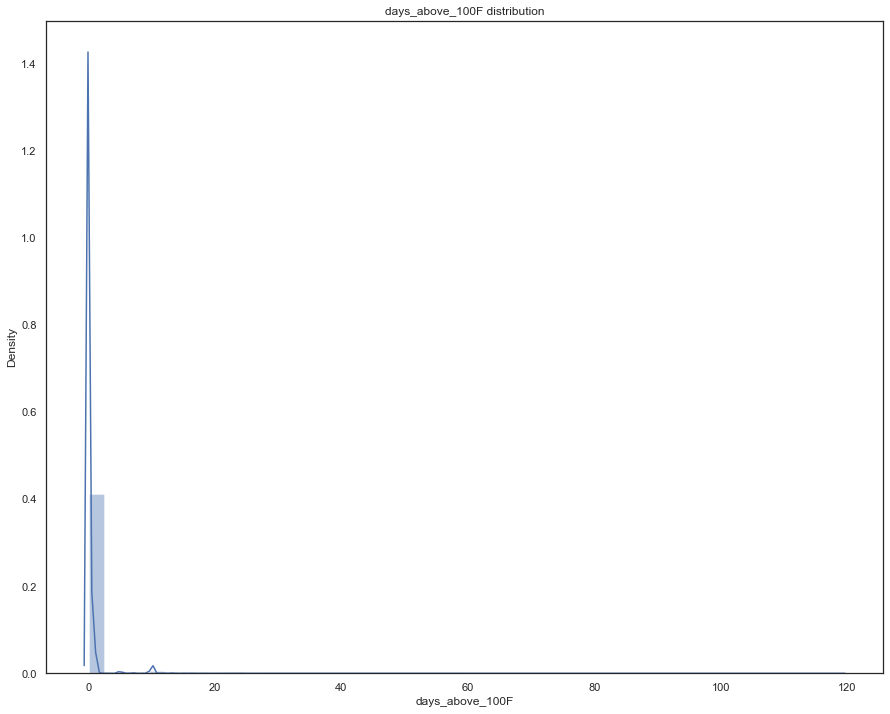

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


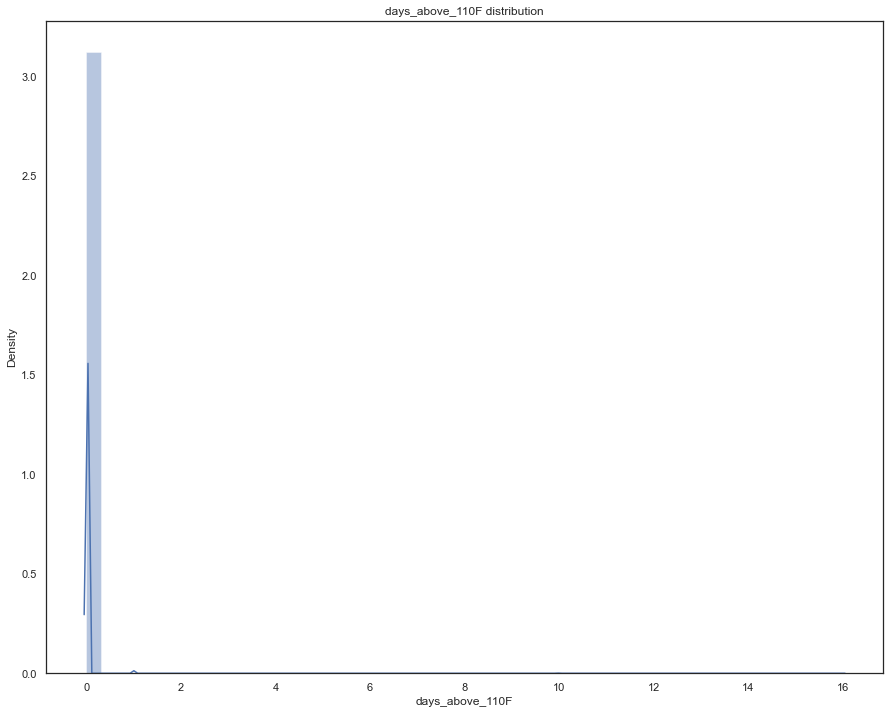

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


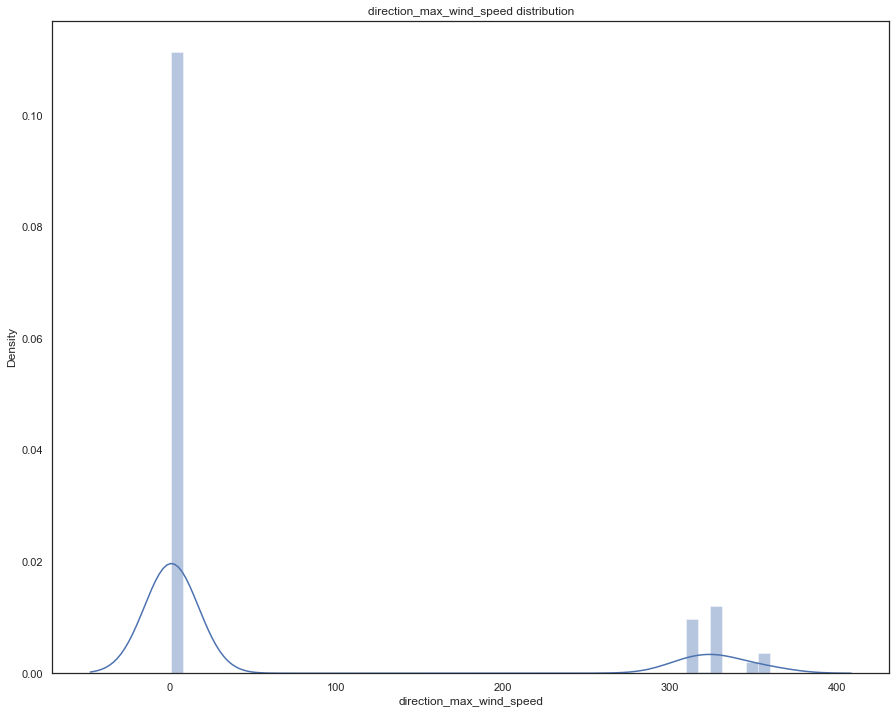

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


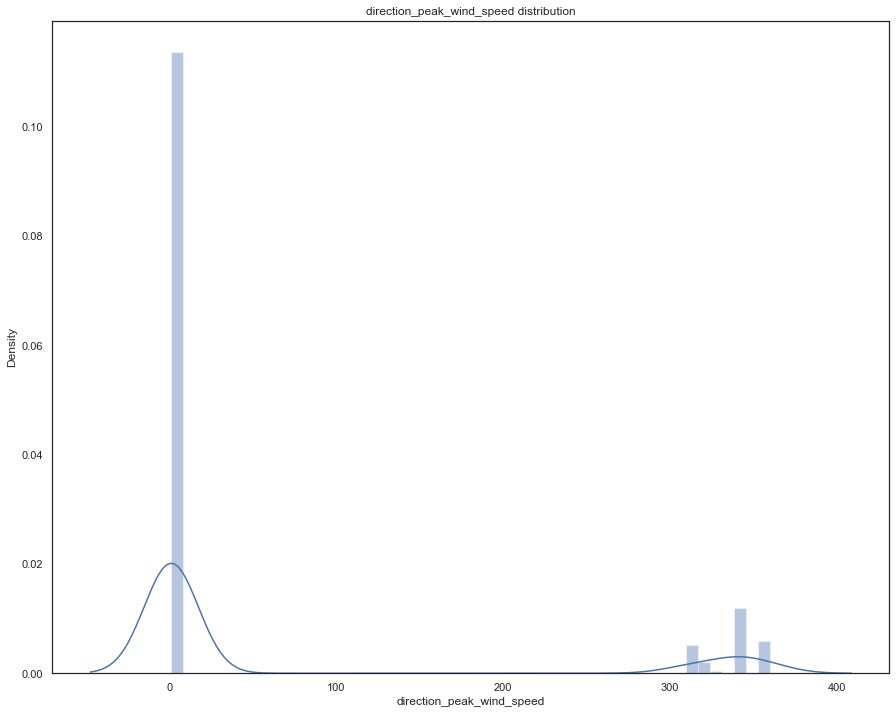

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


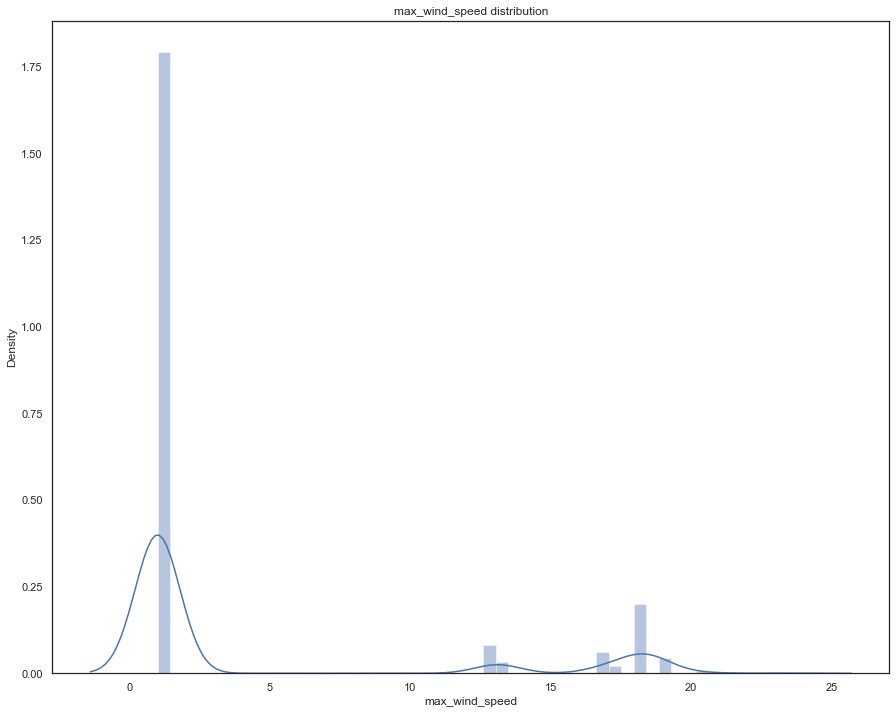

/Users/mezgha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


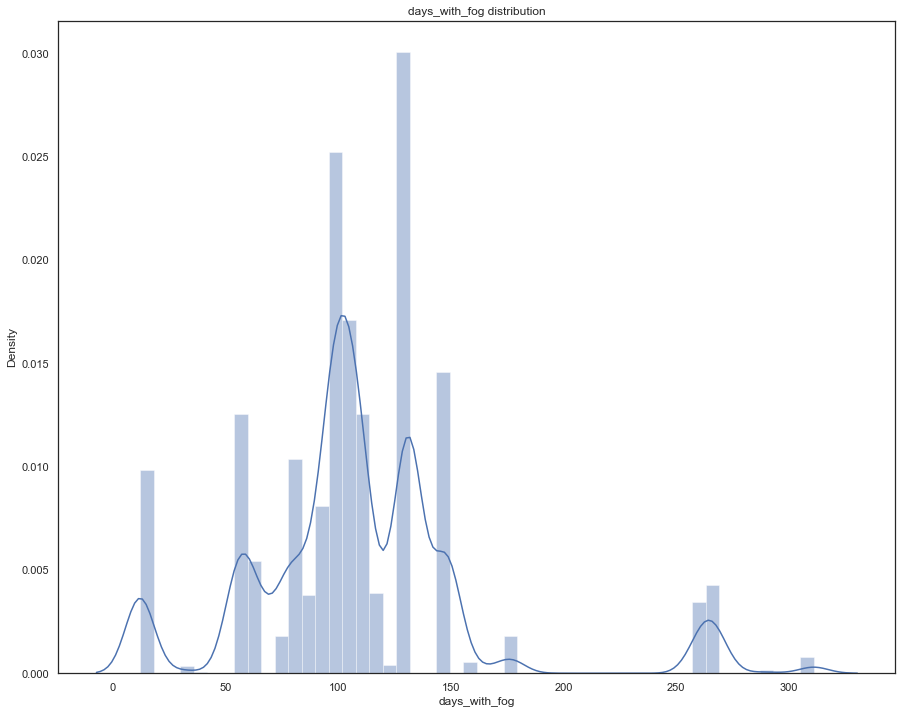

In [103]:
#Relationship between target variable and numerical variables using histograms
cols = [
    "Year_Factor",
    "floor_area",
    "year_built",
    "energy_star_rating",
    "ELEVATION",
    "cooling_degree_days",
    "heating_degree_days",
    "precipitation_inches",
    "snowfall_inches",
    "snowdepth_inches",
    "avg_temp",
    "days_below_30F",
    "days_below_20F",
    "days_below_10F",
    "days_below_0F",
    "days_above_80F",
    "days_above_90F",
    "days_above_100F",
    "days_above_110F",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]

for i in cols:
    plt.figure(figsize=(15,12))
    sns.distplot(df_train[i],kde=True)
    plt.title(i+" distribution")
    plt.show()


In [104]:
df_train.columns


Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

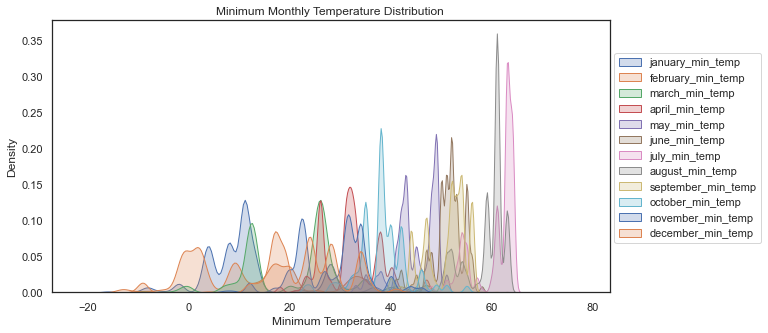

In [149]:
##Visualize min,ave and max temperaturesin each month
min_temp=['january_min_temp','february_min_temp','march_min_temp','april_min_temp','may_min_temp','june_min_temp',
         'july_min_temp','august_min_temp','september_min_temp','october_min_temp','november_min_temp',
          'december_min_temp']
for col in min_temp:
    sns.kdeplot(df_train[col], shade=True)
    plt.xlabel("Minimum Temperature")
    plt.title("Minimum Monthly Temperature Distribution ")
plt.legend(min_temp,bbox_to_anchor=(1.28, .9))




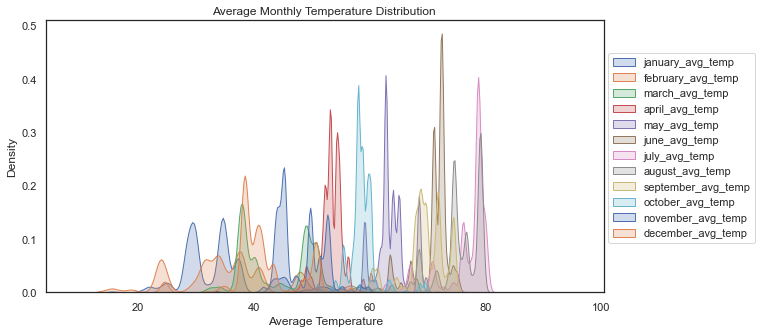

In [151]:
avg_temp=['january_avg_temp','february_avg_temp','march_avg_temp','april_avg_temp','may_avg_temp','june_avg_temp',
         'july_avg_temp','august_avg_temp','september_avg_temp','october_avg_temp','november_avg_temp',
          'december_avg_temp']
for col in avg_temp:
    sns.kdeplot(df_train[col], shade=True)
    plt.xlabel("Average Temperature")
    plt.title("Average Monthly Temperature Distribution ")
plt.legend(avg_temp,bbox_to_anchor=(1.28,.9))



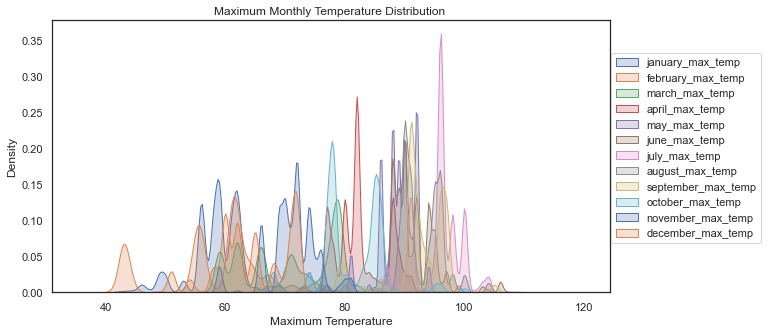

In [152]:
max_temp=['january_max_temp','february_max_temp','march_max_temp','april_max_temp','may_max_temp','june_max_temp',
         'july_max_temp','august_max_temp','september_max_temp','october_max_temp','november_max_temp',
          'december_max_temp']
for col in max_temp:
    sns.kdeplot(df_train[col], shade=True)
    plt.xlabel("Maximum Temperature")
    plt.title("Maximum Monthly Temperature Distribution ")
plt.legend(max_temp,bbox_to_anchor=(1.28, .9))

columns that are correlated higher or equal to .8 are :  ['january_avg_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'april_min_temp', 'july_avg_temp', 'august_min_temp', 'august_avg_temp', 'september_min_temp', 'september_avg_temp', 'december_avg_temp', 'cooling_degree_days', 'heating_degree_days', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_above_80F', 'direction_peak_wind_speed', 'max_wind_speed']
columns that are correlated higher or equal to .9 are :  ['january_avg_temp', 'february_avg_temp', 'march_min_temp', 'december_avg_temp', 'cooling_degree_days', 'heating_degree_days', 'days_below_10F', 'direction_peak_wind_speed', 'max_wind_speed']
columns that are correlated higher or equal to .99 are :  ['direction_peak_wind_speed', 'max_wind_speed']


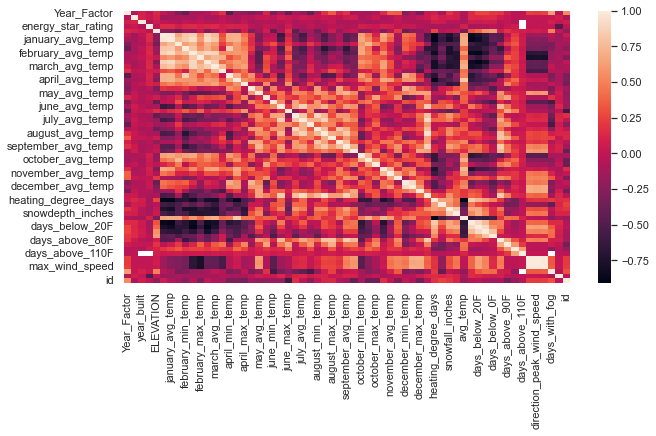

In [159]:
####Investigate correlations
data_cor = df_train.corr()

sns.heatmap(data_cor)
data_df_upper = data_cor.where(
    np.triu(np.ones(data_cor.shape, dtype=int), k=1).astype(bool)
)
cor80 = [col for col in data_df_upper.columns if any(abs(data_df_upper[col]) >= 0.8)]
print('columns that are correlated higher or equal to .8 are : ', cor80)

cor90 = [col for col in data_df_upper.columns if any(abs(data_df_upper[col]) >= 0.9)]
print('columns that are correlated higher or equal to .9 are : ', cor90)

cor99 = [col for col in data_df_upper.columns if any(abs(data_df_upper[col]) >= 0.99)]
print('columns that are correlated higher or equal to .99 are : ', cor99)

In [160]:
#####Data Preprocessing#####


<AxesSubplot:>

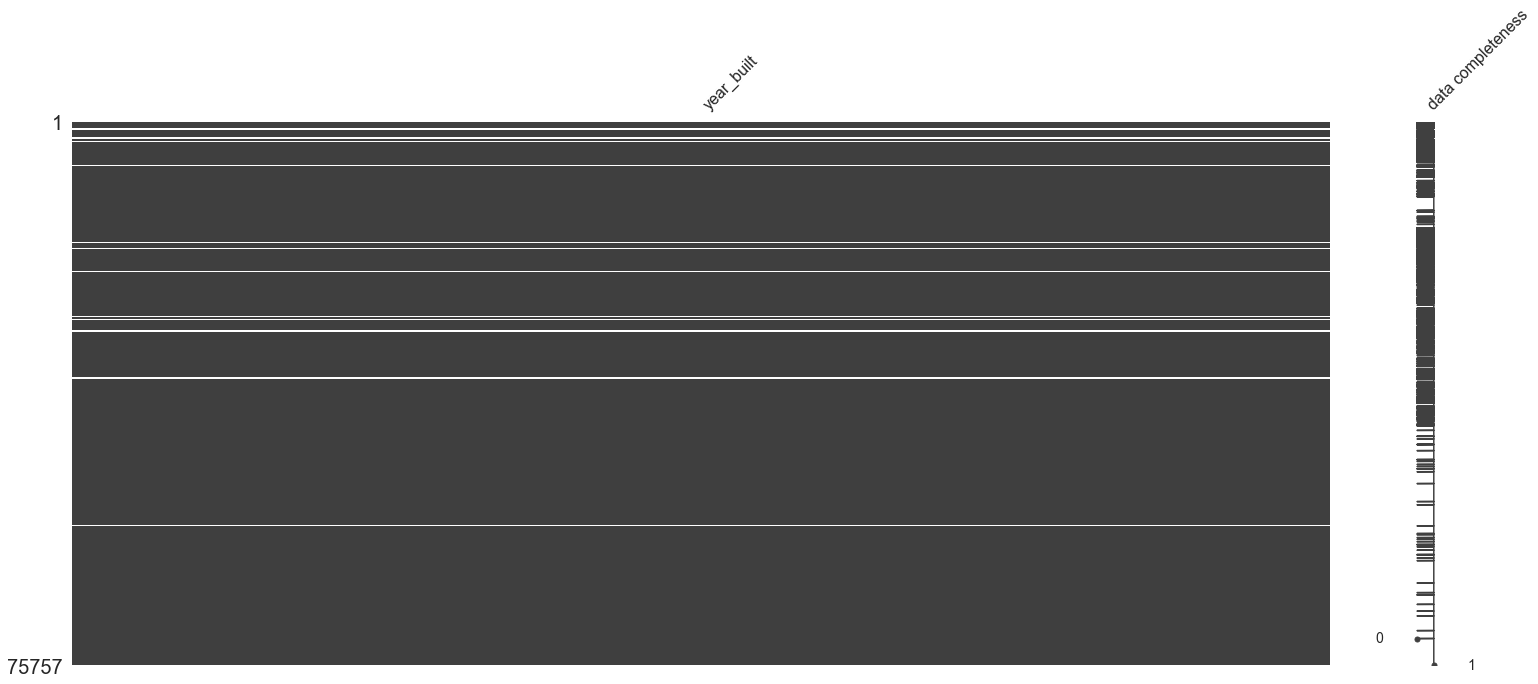

In [166]:
##Handling missing data 
year_built_missing=df_train[['year_built']]
msno.matrix(year_built_missing,labels=True)


<AxesSubplot:>

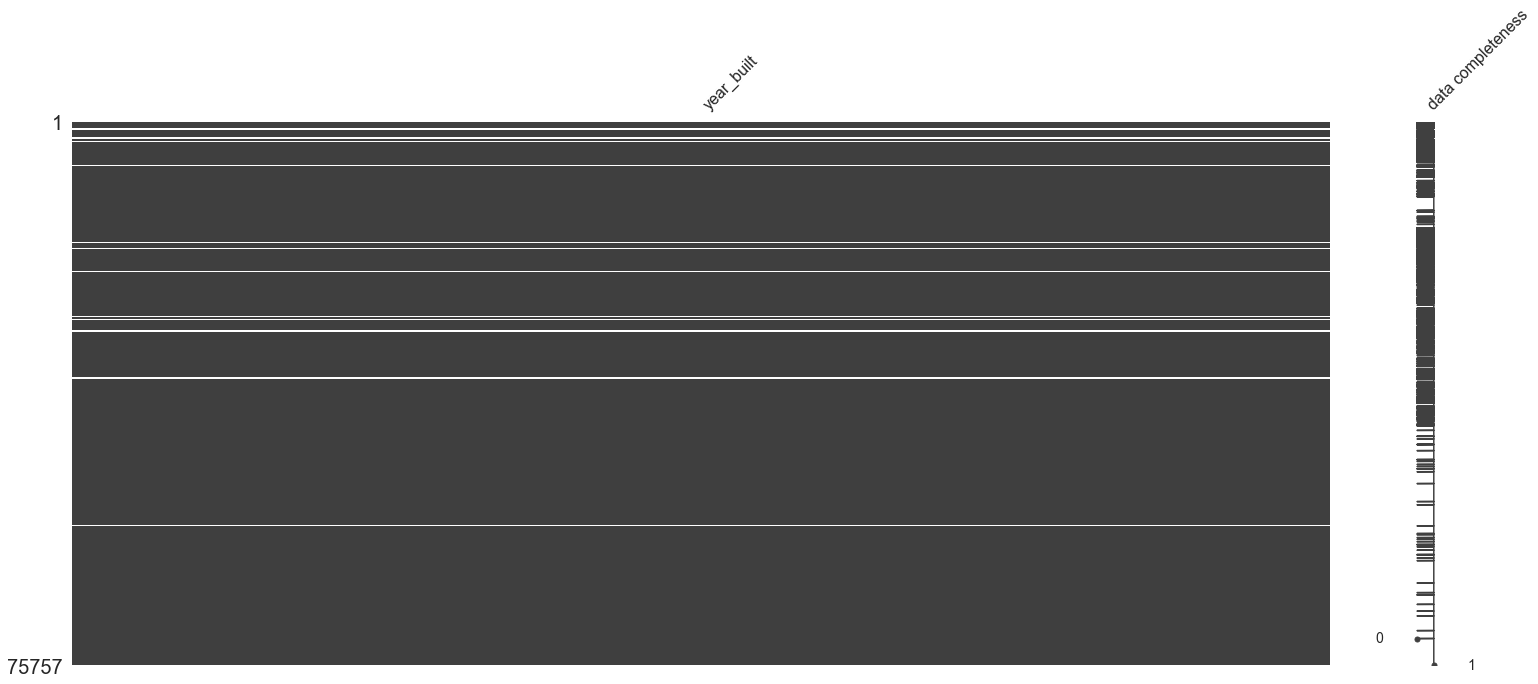

In [171]:
year_built_missing_test=df_test[['year_built']]
msno.matrix(year_built_missing,labels=True)

In [173]:
df_test['year_built'].median()

1969.0

In [170]:
## I see that most data is missing in earlier year, and the median is 1951, so I would replace the missing values 
#by the median 
df_train['year_built'].median()

1951.0

In [177]:
# year_built: replace with median
df_train["year_built"] = df_train["year_built"].replace(np.nan, 1951)



In [185]:
## for test data
df_test["year_built"] = df_test["year_built"].replace(np.nan, 1951)

In [184]:
 ##confirm that we dont have null values in year built in train data 
    df_train['year_built'].isna().sum()

0

In [186]:
 ##confirm that we dont have null values in year built in test data 
df_test['year_built'].isna().sum()

0

In [189]:
from sklearn.impute import SimpleImputer

null_col = [
    "energy_star_rating",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]

imputer = SimpleImputer(strategy='median')
imputer.fit(df_train[null_col])
data_transformed = imputer.transform(df_train[null_col])
df_train[null_col] = pd.DataFrame(data_transformed)


In [190]:
# rechecking null values
cols_with_missing = [col for col in df_train.columns if df_train[col].isnull().any()]
cols_with_missing

[]

In [191]:
###Impute test data
null_col = [
    "energy_star_rating",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]

imputer = SimpleImputer(strategy='median')
imputer.fit(df_train[null_col])
data_transformed = imputer.transform(df_test[null_col])
df_test[null_col] = pd.DataFrame(data_transformed)


In [192]:
# rechecking null values
cols_with_missing = [col for col in df_test.columns if df_test[col].isnull().any()]
cols_with_missing

[]

In [194]:
####Label encoding for categorical values  ['State_Factor' 'building_class' 'facility_type']
for col in df_cat:
    print(df_cat[col].unique())

['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10', 'State_11']
Categories (7, object): ['State_1', 'State_10', 'State_11', 'State_2', 'State_4', 'State_6', 'State_8']
['Commercial', 'Residential']
Categories (2, object): ['Commercial', 'Residential']
['Grocery_store_or_food_market', 'Warehouse_Distribution_or_Shipping_center', 'Retail_Enclosed_mall', 'Education_Other_classroom', 'Warehouse_Nonrefrigerated', ..., 'Public_Safety_Courthouse', 'Public_Assembly_Stadium', 'Lodging_Uncategorized', '2to4_Unit_Building', 'Warehouse_Uncategorized']
Length: 60
Categories (60, object): ['2to4_Unit_Building', '5plus_Unit_Building', 'Commercial_Other', 'Commercial_Unknown', ..., 'Warehouse_Nonrefrigerated', 'Warehouse_Refrigerated', 'Warehouse_Selfstorage', 'Warehouse_Uncategorized']


In [202]:
#temporaly display all columns
with pd.option_context('display.max_seq_items', None):
    print (df_train['facility_type'].unique())

['Grocery_store_or_food_market', 'Warehouse_Distribution_or_Shipping_center', 'Retail_Enclosed_mall', 'Education_Other_classroom', 'Warehouse_Nonrefrigerated', ..., 'Public_Safety_Courthouse', 'Public_Assembly_Stadium', 'Lodging_Uncategorized', '2to4_Unit_Building', 'Warehouse_Uncategorized']
Length: 60
Categories (60, object): ['2to4_Unit_Building', '5plus_Unit_Building', 'Commercial_Other', 'Commercial_Unknown', ..., 'Warehouse_Nonrefrigerated', 'Warehouse_Refrigerated', 'Warehouse_Selfstorage', 'Warehouse_Uncategorized']


In [205]:
cat_cols_building=df_train['facility_type'].unique()
for row in cat_cols_building:
    print(row)


Grocery_store_or_food_market
Warehouse_Distribution_or_Shipping_center
Retail_Enclosed_mall
Education_Other_classroom
Warehouse_Nonrefrigerated
Warehouse_Selfstorage
Office_Uncategorized
Data_Center
Commercial_Other
Mixed_Use_Predominantly_Commercial
Office_Medical_non_diagnostic
Education_College_or_university
Industrial
Laboratory
Public_Assembly_Entertainment_culture
Retail_Vehicle_dealership_showroom
Retail_Uncategorized
Lodging_Hotel
Retail_Strip_shopping_mall
Education_Uncategorized
Health_Care_Inpatient
Public_Assembly_Drama_theater
Public_Assembly_Social_meeting
Religious_worship
Mixed_Use_Commercial_and_Residential
Office_Bank_or_other_financial
Parking_Garage
Commercial_Unknown
Service_Vehicle_service_repair_shop
Service_Drycleaning_or_Laundry
Public_Assembly_Recreation
Service_Uncategorized
Warehouse_Refrigerated
Food_Service_Uncategorized
Health_Care_Uncategorized
Food_Service_Other
Public_Assembly_Movie_Theater
Food_Service_Restaurant_or_cafeteria
Food_Sales
Public_Assembl

In [243]:
warehouse=['Warehouse_Distribution_or_Shipping_center','Warehouse_Nonrefrigerated','Warehouse_Selfstorage','Warehouse_Refrigerated','Warehouse_Uncategorized']
len(warehouse)
def warehouse():
    if df_train['facility_type'] in warehouse:
        


KeyError: 'warehouse'

In [233]:
retail=['Retail_Enclosed_mall','Commercial_Other','Retail_Vehicle_dealership_showroom','Retail_Uncategorized',
        'Retail_Strip_shopping_mall','Office_Bank_or_other_financial','Mixed_Use_Predominantly_Commercial',
       'Mixed_Use_Commercial_and_Residential','Commercial_Unknown','Office_Mixed_use','Office_Uncategorized']




print(len(retail))

11


In [230]:
food=['Grocery_store_or_food_market','Food_Service_Uncategorized','Food_Service_Other','Food_Service_Restaurant_or_cafeteria','Food_Sales']
len(food)

5

In [231]:
education=['Education_College_or_university','Education_Other_classroom','Education_Uncategorized','Education_Preschool_or_daycare']
len(education)

4

In [232]:
healthcare=['Office_Medical_non_diagnostic','Industrial','Laboratory','Health_Care_Inpatient','Health_Care_Uncategorized','Health_Care_Outpatient_Clinic',
           'Health_Care_Outpatient_Uncategorized','Nursing_Home']
len(healthcare)

8

In [234]:
building_units=['2to4_Unit_Building','5plus_Unit_Building','Multifamily_Uncategorized', 'Mixed_Use_Predominantly_Residential']
len(building_units)

4

In [236]:
lodging=['Lodging_Uncategorized','Lodging_Other','Lodging_Dormitory_or_fraternity_sorority','Lodging_Hotel']
len(lodging)

4

In [237]:
public_assembly=['Public_Assembly_Entertainment_culture','Public_Assembly_Drama_theater','Public_Assembly_Social_meeting','Religious_worship',
                 'Public_Assembly_Movie_Theater','Public_Assembly_Recreation','Public_Assembly_Uncategorized',
                 'Public_Assembly_Library','Public_Safety_Uncategorized','Public_Safety_Fire_or_police_station','Public_Safety_Courthouse', 'Public_Assembly_Stadium','Public_Assembly_Other',
                'Public_Safety_Penitentiary']
len(public_assembly)

14

In [248]:
services=['Service_Vehicle_service_repair_shop','Service_Drycleaning_or_Laundry','Service_Uncategorized']
len(services)

3

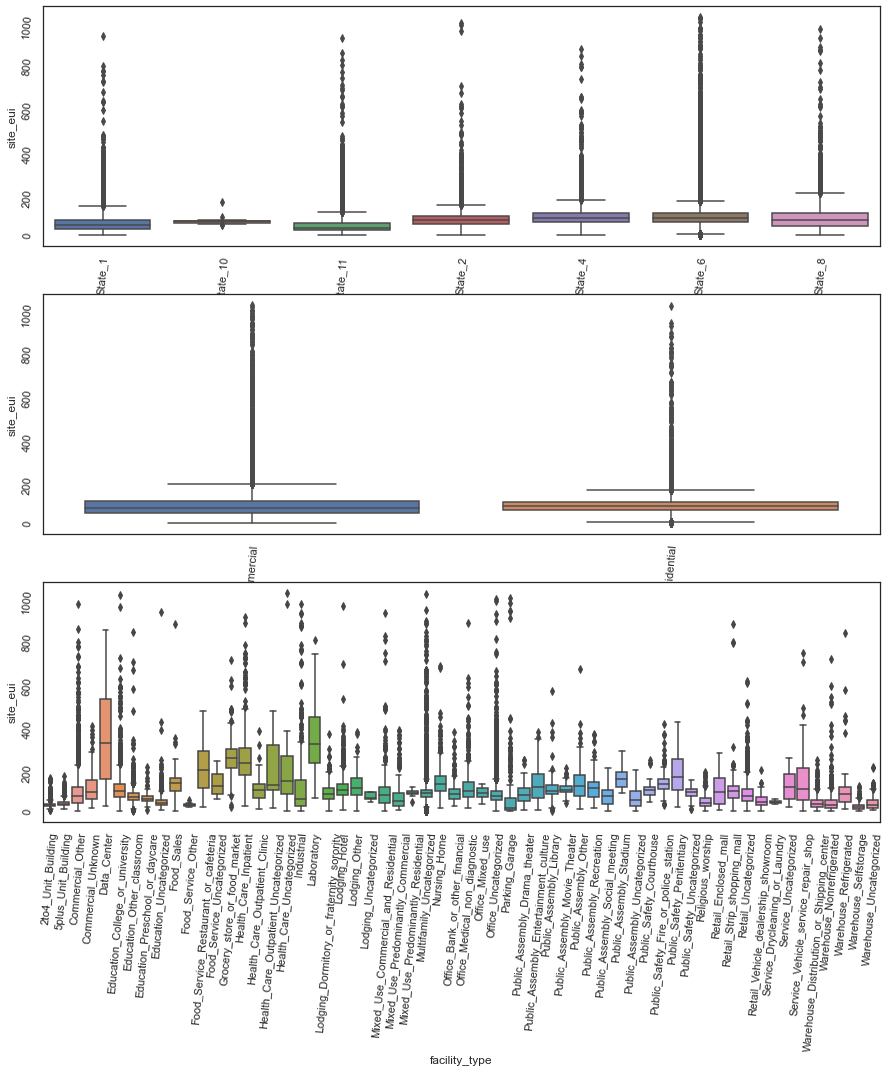

In [203]:
plt.figure(figsize=(15, 15))
sns.set(style="white")
i = 1
for col in cat_cols:
    plt.subplot(3, 1, i)
    ax = sns.boxplot(data=df_train, x=col, y="site_eui")
    i = i + 1
    ax.tick_params(labelrotation=85)
plt.show()
